## 1. Patterns in nature
<p><img style="float: left;margin:2px 2px 2px 2px" src="https://s3.amazonaws.com/assets.datacamp.com/production/project_62/img/phyllotaxis2.png" height="300" width="300"></p>
<p>** <em>The scientist does not study nature because it is useful; he studies it because he delights in it, and he delights in it because it is beautiful (Henri Poincaré)</em> **</p>
<p>There are many examples of <em>natural facts</em> that can be described in mathematical terms. Nice examples are the shape of snowflakes, the <em>fractal geometry</em> of romanesco broccoli or how self-similarity rules the growth of plants.</p>
<p>R is a tool for doing serious analysis, but not everything in life is serious. Life is also funny, and R can be used to have fun and to do beautiful things. Its graphical power can be used to produce artistic images like the one that illustrates this section, which is inspired by how plants arrange their leaves. This fact is called <em>phyllotaxis</em> and will serve as the basis of this project.</p>
<p>In this notebook, we are using the <code>ggplot2</code> package. Apart from having fun, we will learn many important features of it that will be useful not only to do art but also to represent data in real-life problems. Let's start by loading the library.</p>

In [228]:
# This sets plot images to a nice size.
options(repr.plot.width = 4, repr.plot.height = 4)

# Loading in the ggplot2 package
library(ggplot2)

In [229]:
library(testthat) 
library(IRkernel.testthat)

run_tests({
    test_that("Test that ggplot2 is loaded", {
    expect_true( "package:ggplot2" %in% search(), 
        info = "The ggplot2 package should be loaded using library().")
    })
})

<ProjectReporter>
  Inherits from: <ListReporter>
  Public:
    .context: NULL
    .end_context: function (context) 
    .start_context: function (context) 
    add_result: function (context, test, result) 
    all_tests: environment
    cat: function (..., file = NULL, sep = " ", fill = FALSE, labels = NULL, 
    cat_line: function (...) 
    cat_paragraph: function (...) 
    cat_tight: function (...) 
    clone: function (deep = FALSE) 
    current_expectations: environment
    current_file: some name
    current_start_time: 28.724 0.204 2624.246 0 0
    dump_test: function (test) 
    end_context: function (context) 
    end_reporter: function () 
    end_test: function (context, test) 
    get_results: function () 
    initialize: function (...) 
    out: 3
    results: environment
    start_context: function (context) 
    start_file: function (name) 
    start_reporter: function () 
    start_test: function (context, test) 

## 2. Warming up: drawing points on a circle
<p>There are many ways to represent data with <code>ggplot2</code>: from simple scatter plots to more complex ones, such as <em>violin</em> plots. The functions that start with <code>geom_</code> define how the plot is shown. In this notebook, we will only work with <code>geom_point</code> which plots points in two dimensions. We just need a dataset with two variables, let's call them <code>x</code> and <code>y</code>.</p>
<p>Let's start by drawing 50 points on a circle of radius 1. As every <code>(x, y)</code> point should be in the unit circle, it follows that x² + y² = 1. We can get this using the <em>superfamous</em> Pythagorean trigonometric identity which states that sin²(θ) + cos²(θ) = 1 for any real number θ.</p>

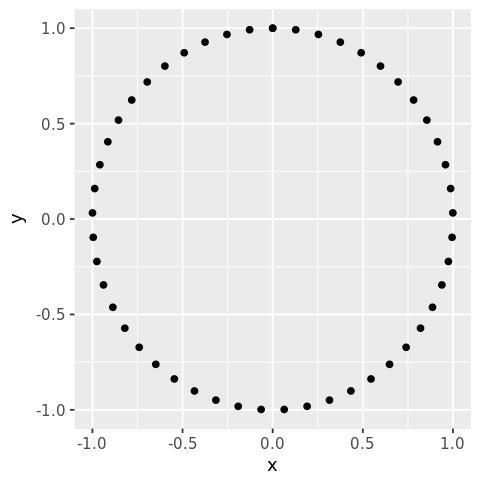

In [230]:
t <- seq(0, 2*pi, length.out = 50)
x <- sin(t)
y <- cos(t)
df <- data.frame(t, x, y)

# Make a scatter plot of points in a circle
p <- ggplot(df, aes(x, y))
p + geom_point()

In [231]:
run_tests({
    test_that("Check that a geom_point plot was plotted.", {
    expect_true( "GeomPoint" %in% class( last_plot()$layers[[1]]$geom ) , 
        info = "Add geom_point() to produce a scatter plot.")
    })
})

<ProjectReporter>
  Inherits from: <ListReporter>
  Public:
    .context: NULL
    .end_context: function (context) 
    .start_context: function (context) 
    add_result: function (context, test, result) 
    all_tests: environment
    cat: function (..., file = NULL, sep = " ", fill = FALSE, labels = NULL, 
    cat_line: function (...) 
    cat_paragraph: function (...) 
    cat_tight: function (...) 
    clone: function (deep = FALSE) 
    current_expectations: environment
    current_file: some name
    current_start_time: 28.928 0.204 2624.447 0 0
    dump_test: function (test) 
    end_context: function (context) 
    end_reporter: function () 
    end_test: function (context, test) 
    get_results: function () 
    initialize: function (...) 
    out: 3
    results: environment
    start_context: function (context) 
    start_file: function (name) 
    start_reporter: function () 
    start_test: function (context, test) 

## 3. Make it harmonious with the Golden Angle
<p>Plants arrange their leaves in spirals. A spiral is a curve starts from the origin and <em>moves away</em> from this point as it revolves around it. In the plot above all our points are at the same distance from the origin. A simple way to arrange them in a spiral is to multiply <code>x</code> and <code>y</code> by a factor which increases for each point. We <em>could</em> use <code>t</code> as that factor, as it meets these conditions, but we will do something more <em>harmonious</em>. We will use the <a href="https://en.wikipedia.org/wiki/Golden_angle">Golden Angle</a>:</p>
<p>Golden Angle = π(3 − √5)</p>
<p>This number is inspired by the Golden Ratio, one of the most famous numbers in the history of mathematics. Both the Golden Ratio and the Golden Angle appear in unexpected places in nature. Apart of flower petals and plant leaves, you'll find them in seed heads, pine cones, sunflower seeds, shells, spiral galaxies, hurricanes, etc.</p>
<p>It's time to <em>spiralize</em>!</p>

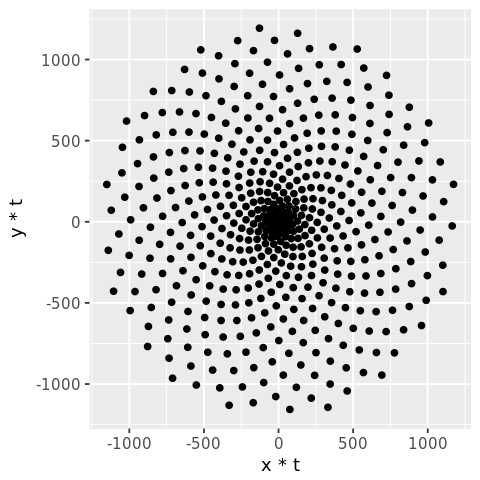

In [232]:
# Defining the number of points
points <- 500

# Defining the Golden Angle
angle <- pi*(3-sqrt(5))
t <- (1:points) * angle
x <- sin(t)
y <-cos(t)
df <- data.frame(t, x, y)

# Make a scatter plot of points in a spiral
p <- ggplot(df, aes(x*t, y*t))
p + geom_point()

In [233]:
run_tests({
    test_that("points are 500.", {
    expect_equal(points, 500, 
        info = "There should be 500 points.")
    })
    
    test_that("angle is golden.", {
    expect_equal(angle, pi*(3-sqrt(5)), 
        info = "angle should be set to the Golden Angel. Check the hint!")
    })
})

<ProjectReporter>
  Inherits from: <ListReporter>
  Public:
    .context: NULL
    .end_context: function (context) 
    .start_context: function (context) 
    add_result: function (context, test, result) 
    all_tests: environment
    cat: function (..., file = NULL, sep = " ", fill = FALSE, labels = NULL, 
    cat_line: function (...) 
    cat_paragraph: function (...) 
    cat_tight: function (...) 
    clone: function (deep = FALSE) 
    current_expectations: environment
    current_file: some name
    current_start_time: 29.284 0.208 2624.812 0 0
    dump_test: function (test) 
    end_context: function (context) 
    end_reporter: function () 
    end_test: function (context, test) 
    get_results: function () 
    initialize: function (...) 
    out: 3
    results: environment
    start_context: function (context) 
    start_file: function (name) 
    start_reporter: function () 
    start_test: function (context, test) 

## 4. Remove everything unnecessary
<p>Apart from data, a plot includes many other components that define its final appearance. Our previous plot contains:</p>
<ul>
<li>a <strong>background</strong> filled with grey color.</li>
<li>a <strong>grid</strong> of horizontal and vertical white lines in the background.</li>
<li><strong>ticks</strong> along the axis.</li>
<li>a <strong>title</strong> on each axis.</li>
<li><strong>text</strong> along axes to label marks.</li>
</ul>
<p>Art does not get along with most of these elements, so it's time to move to action.</p>

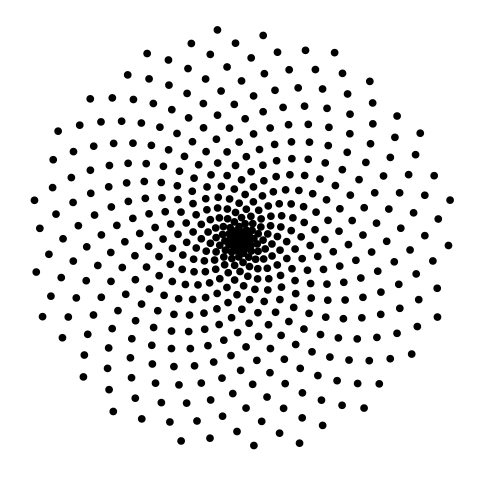

In [234]:
df <- data.frame(t, x, y)

# Make a scatter plot of points in a spiral
p <- ggplot(df, aes(x*t, y*t))
p + geom_point() +
# theme_void() this works fine but not pass the check
theme(panel.background = element_rect(fill = "white"),
        axis.title=element_blank(),
        axis.text=element_blank(),
        axis.ticks=element_blank(),
        #axis.title.y=element_blank(),
        #axis.text.y=element_blank(),
        #axis.ticks.y=element_blank(),
        panel.grid = element_blank())

In [235]:
# Maybe just check if one of the this are blank, 
# seems too much to check them all...

run_tests({
    test_that("Background is white.", {
    expect_equal(last_plot()$theme$panel.background$fill, "white", 
        info = "The background should be white.")
    })
    test_that("Grid is removed.", {
    expect_true("element_blank" %in% class(last_plot()$theme$panel.grid), 
        info = "The grid lines should be removed.")
    })
})

<ProjectReporter>
  Inherits from: <ListReporter>
  Public:
    .context: NULL
    .end_context: function (context) 
    .start_context: function (context) 
    add_result: function (context, test, result) 
    all_tests: environment
    cat: function (..., file = NULL, sep = " ", fill = FALSE, labels = NULL, 
    cat_line: function (...) 
    cat_paragraph: function (...) 
    cat_tight: function (...) 
    clone: function (deep = FALSE) 
    current_expectations: environment
    current_file: some name
    current_start_time: 29.548 0.208 2625.077 0 0
    dump_test: function (test) 
    end_context: function (context) 
    end_reporter: function () 
    end_test: function (context, test) 
    get_results: function () 
    initialize: function (...) 
    out: 3
    results: environment
    start_context: function (context) 
    start_file: function (name) 
    start_reporter: function () 
    start_test: function (context, test) 

## 5. A bit of makeup: size, color and transparency
<p>Our drawing starts to look like a plant, but we can do it much better. By changing color, transparency (also called <em>alpha</em>), and size of the points, the image will become more appealing.</p>

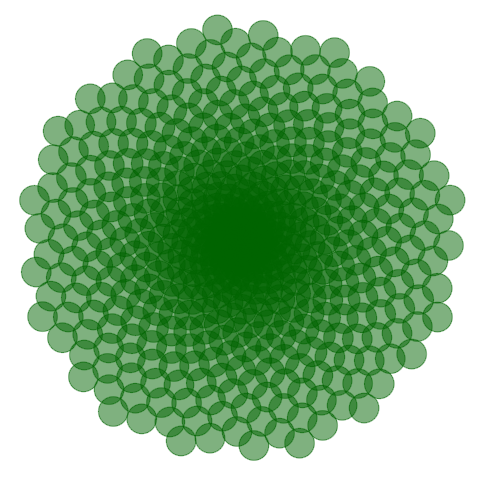

In [236]:
p <- ggplot(df, aes(x*t, y*t))
p + geom_point(size=8, alpha = 0.5, color="darkgreen") +
theme(panel.background = element_rect(fill = "white"),
        axis.title=element_blank(),
        axis.text=element_blank(),
        axis.ticks=element_blank(),
        panel.grid = element_blank())

In [237]:
run_tests({
    test_that("Point size equal to 8.", {
    expect_equal(last_plot()$layers[[1]]$aes_params$size, 8, 
        info = "size should be set 8.")
    })
    test_that("alpha equal to 0.5.", {
    expect_equal(last_plot()$layers[[1]]$aes_params$alpha, 0.5, 
        info = "alpha should be set 0.5.")
    })
})

<ProjectReporter>
  Inherits from: <ListReporter>
  Public:
    .context: NULL
    .end_context: function (context) 
    .start_context: function (context) 
    add_result: function (context, test, result) 
    all_tests: environment
    cat: function (..., file = NULL, sep = " ", fill = FALSE, labels = NULL, 
    cat_line: function (...) 
    cat_paragraph: function (...) 
    cat_tight: function (...) 
    clone: function (deep = FALSE) 
    current_expectations: environment
    current_file: some name
    current_start_time: 29.908 0.208 2625.438 0 0
    dump_test: function (test) 
    end_context: function (context) 
    end_reporter: function () 
    end_test: function (context, test) 
    get_results: function () 
    initialize: function (...) 
    out: 3
    results: environment
    start_context: function (context) 
    start_file: function (name) 
    start_reporter: function () 
    start_test: function (context, test) 

## 6. Play with aesthetics: the dandelion
<p>Until now, all points have the same appearance (<code>size</code>, <code>color</code>, <code>shape</code>, and <code>alpha</code>). Sometimes you will want to make the appearance of the points dependent on a variable in your dataset. Now we will make size variable. We will also change the shape of points. Although we won't be able to blow on it, the resulting image should remind you of a dandelion.</p>

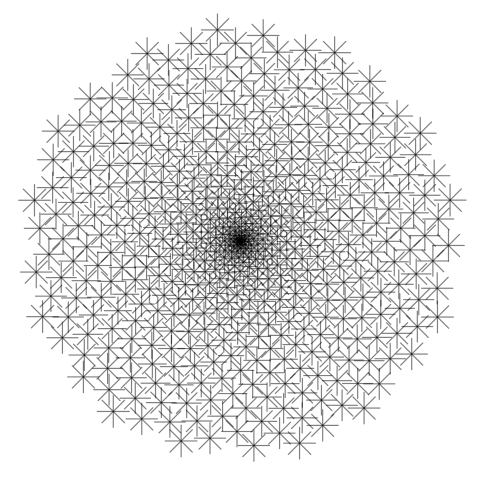

In [238]:
p <- ggplot(df, aes(x*t, y*t))
p + geom_point(aes(size=t), alpha = 0.5, color="black", shape =8) +
theme(panel.background = element_rect(fill = "white"),
        axis.title=element_blank(),
        axis.text=element_blank(),
        axis.ticks=element_blank(),
        panel.grid = element_blank(),
        legend.position = "none")

In [239]:
run_tests({
    test_that("Map size of points to t.", {
    expect_equal(last_plot()$labels$size, "t", 
        info = "Map size of points to t. Check the hint!")
    })
    test_that("point shape is asterisk.", {
    expect_equal(last_plot()$layers[[1]]$aes_params$shape, 8, 
        info = "Change the shape of all points to asterisks.")
    })
    test_that("Legend is removed.", {
    expect_equal(last_plot()$theme$legend.position, "none", 
        info = "Remove the legend from the plot.")
    })
})

<ProjectReporter>
  Inherits from: <ListReporter>
  Public:
    .context: NULL
    .end_context: function (context) 
    .start_context: function (context) 
    add_result: function (context, test, result) 
    all_tests: environment
    cat: function (..., file = NULL, sep = " ", fill = FALSE, labels = NULL, 
    cat_line: function (...) 
    cat_paragraph: function (...) 
    cat_tight: function (...) 
    clone: function (deep = FALSE) 
    current_expectations: environment
    current_file: some name
    current_start_time: 30.224 0.212 2625.755 0 0
    dump_test: function (test) 
    end_context: function (context) 
    end_reporter: function () 
    end_test: function (context, test) 
    get_results: function () 
    initialize: function (...) 
    out: 3
    results: environment
    start_context: function (context) 
    start_file: function (name) 
    start_reporter: function () 
    start_test: function (context, test) 

## 7. Put all it together: the sunflower
<p>Plants not only use the Golden Angle to arrange leaves. It is also found in the arrangement of sunflower seeds. We don't need anything new to draw a sunflower; we just need to combine some of the things we already know.</p>

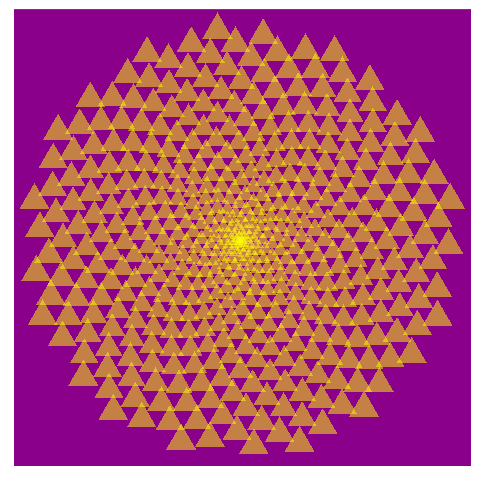

In [240]:
p <- ggplot(df, aes(x*t, y*t))
p + geom_point(aes(size=t), alpha = 0.5, color="yellow", shape =17) +
theme(panel.background = element_rect(fill = "darkmagenta"),
        axis.title=element_blank(),
        axis.text=element_blank(),
        axis.ticks=element_blank(),
        panel.grid = element_blank(),
        legend.position = "none")

In [241]:
run_tests({
    test_that("point shape is filled triangles.", {
    expect_equal(last_plot()$layers[[1]]$aes_params$shape, 17, 
        info = "Change the shape of all points to filled triangles. Check the hint!")
    })
    test_that("Legend is removed.", {
    expect_equal(last_plot()$layers[[1]]$aes_params$colour, "yellow", 
        info = "Remove the legend from the plot.")
    })
})

<ProjectReporter>
  Inherits from: <ListReporter>
  Public:
    .context: NULL
    .end_context: function (context) 
    .start_context: function (context) 
    add_result: function (context, test, result) 
    all_tests: environment
    cat: function (..., file = NULL, sep = " ", fill = FALSE, labels = NULL, 
    cat_line: function (...) 
    cat_paragraph: function (...) 
    cat_tight: function (...) 
    clone: function (deep = FALSE) 
    current_expectations: environment
    current_file: some name
    current_start_time: 30.532 0.216 2626.069 0 0
    dump_test: function (test) 
    end_context: function (context) 
    end_reporter: function () 
    end_test: function (context, test) 
    get_results: function () 
    initialize: function (...) 
    out: 3
    results: environment
    start_context: function (context) 
    start_file: function (name) 
    start_reporter: function () 
    start_test: function (context, test) 

## 8. What if you modify the angle?
<p>These patterns are very sensitive to the angle between the points that form the spiral; small changes to the angel can generate very different images. Let's look at an example of that.</p>

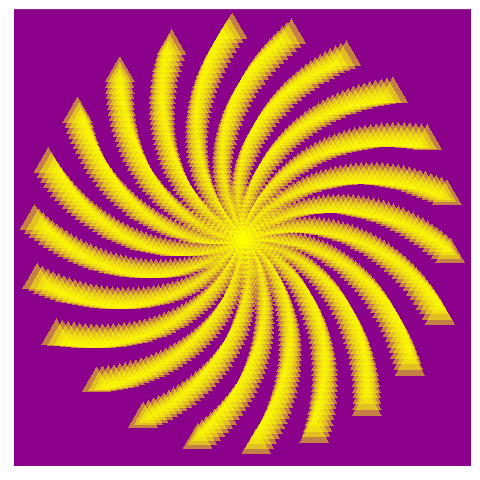

In [242]:
#angle <- pi*(3-sqrt(5))
angle <- 2.0
points <- 1000

t <- (1:points)*angle
x <- sin(t)
y <- cos(t)

df <- data.frame(t, x, y)

p <- ggplot(df, aes(x*t, y*t))
p + geom_point(aes(size=t), alpha = 0.5, color="yellow", shape =17) +
theme(panel.background = element_rect(fill = "darkmagenta"),
        axis.title=element_blank(),
        axis.text=element_blank(),
        axis.ticks=element_blank(),
        panel.grid = element_blank(),
        legend.position = "none")

In [243]:
run_tests({
    test_that("angle is 2.", {
    expect_equal(angle, 2, 
        info = "angle should be equal to 2")
    })
})

<ProjectReporter>
  Inherits from: <ListReporter>
  Public:
    .context: NULL
    .end_context: function (context) 
    .start_context: function (context) 
    add_result: function (context, test, result) 
    all_tests: environment
    cat: function (..., file = NULL, sep = " ", fill = FALSE, labels = NULL, 
    cat_line: function (...) 
    cat_paragraph: function (...) 
    cat_tight: function (...) 
    clone: function (deep = FALSE) 
    current_expectations: environment
    current_file: some name
    current_start_time: 30.792 0.22 2626.346 0 0
    dump_test: function (test) 
    end_context: function (context) 
    end_reporter: function () 
    end_test: function (context, test) 
    get_results: function () 
    initialize: function (...) 
    out: 3
    results: environment
    start_context: function (context) 
    start_file: function (name) 
    start_reporter: function () 
    start_test: function (context, test) 

## 9. All together now: imaginary flowers
<p><img style="float: left;margin:2px 2px 2px 2px" src="https://s3.amazonaws.com/assets.datacamp.com/production/project_62/img/flower.png" height="280" width="280"></p>
<p>The techniques you've seen so far allows you to create an <em>infinite</em> number of patterns inspired by nature: the only limit is your imagination. But making art has also been a fun excuse to learn to use <code>ggplot</code>. All the tricks we have seen in this notebook are useful when plotting <em>real</em> data too.</p>
<p>The image on the left is a simple variation of the previous flower and is in essence very similar to the first figure in which we plotted 50 points in a circle. I hope you've enjoyed the journey between that simple circle and this beautiful flower.</p>

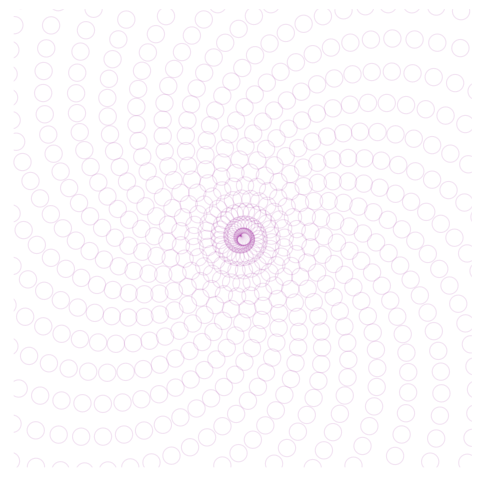

In [249]:
angle <- 13*pi/180
points <- 2000

t <- (1:points)*angle
x <- sin(t)
y <- cos(t)

df <- data.frame(t, x, y)

p <- ggplot(df, aes(x*t, y*t))
p + geom_point(aes(size=80), alpha = 0.1, color="magenta4", shape =1) +
coord_cartesian(xlim = c(-100, 100), ylim = c(-100, 100))+
theme(panel.background = element_rect(fill = "white"),
        axis.title=element_blank(),
        axis.text=element_blank(),
        axis.ticks=element_blank(),
        panel.grid = element_blank(),
        legend.position = "none") 
 

In [245]:
run_tests({
    test_that("points is equal to 2000.", {
    expect_equal(points, 2000, 
        info = "There should be 2000 points.")
    })
    test_that("point shape is asterisk.", {
    expect_equal(last_plot()$layers[[1]]$aes_params$shape, 1, 
        info = "Change the shape of all points to empty circles. Check the hint!")
    })
    test_that("Background is white.", {
    expect_equal(last_plot()$theme$panel.background$fill, "white", 
        info = "The background should be white.")
    })
    test_that("angle is 13*pi/180.", {
    expect_equal(angle, 13*pi/180, 
        info = "angle should be set to 13*pi/180.")
    })
})

<ProjectReporter>
  Inherits from: <ListReporter>
  Public:
    .context: NULL
    .end_context: function (context) 
    .start_context: function (context) 
    add_result: function (context, test, result) 
    all_tests: environment
    cat: function (..., file = NULL, sep = " ", fill = FALSE, labels = NULL, 
    cat_line: function (...) 
    cat_paragraph: function (...) 
    cat_tight: function (...) 
    clone: function (deep = FALSE) 
    current_expectations: environment
    current_file: some name
    current_start_time: 31.244 0.22 2626.797 0 0
    dump_test: function (test) 
    end_context: function (context) 
    end_reporter: function () 
    end_test: function (context, test) 
    get_results: function () 
    initialize: function (...) 
    out: 3
    results: environment
    start_context: function (context) 
    start_file: function (name) 
    start_reporter: function () 
    start_test: function (context, test) 